In [1]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



2025-03-13 20:26:03.663115: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 20:26:03.673695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741893963.685089   45035 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741893963.689582   45035 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 20:26:03.705020: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
d_p = 40
d_V = 40
epochs = 300    


In [3]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(80,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(3,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
])



I0000 00:00:1741893965.869338   45035 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
folder_path = "data/test_data/example_data/heat2d/"

In [5]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

INFO:sciml.model.deeponet.deeponet:Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [6]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 9718.60it/s]


In [7]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [8]:
train_history = model.fit()

Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-13 20:26:08.079404: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 0 completed
Training progress:   0%|          | 1/300 [00:00<04:02,  1.24it/s]2025-03-13 20:26:08.376303: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 1 completed
Training progress:   1%|          | 3/300 [00:01<02:01,  2.45it/s]2025-03-13 20:26:08.957477: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
INFO:sciml.model.deeponet.deeponet:Epoch 3 completed
Training progress:   2%|▏         | 7/300 [00:02<01:30,  3.22it/s]2025-03-13 20:26:10.116388: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT

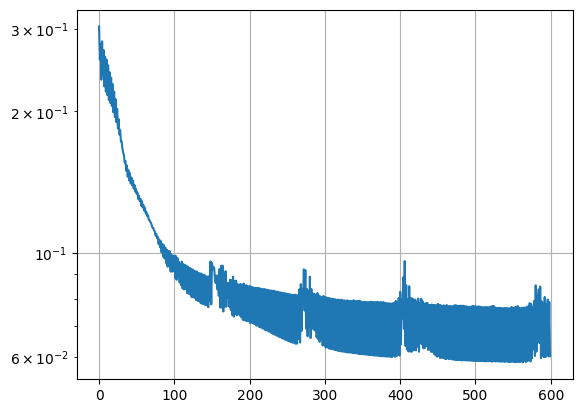

In [9]:
plt.plot(train_history)
#log 
plt.yscale('log')
plt.grid()
plt.show()